# **ADABOOST**

![Return of the Jedi](https://upload.wikimedia.org/wikipedia/commons/thumb/a/ab/Returnofthejedi-logo2.svg/1920px-Returnofthejedi-logo2.svg.png)

Fuente de la imagen: https://es.wikipedia.org

![vader](https://live.staticflickr.com/3735/13300105664_147f86aa4f_b.jpg)

Fuente de la imagen: https://live.staticflickr.com/


## **1. Introducción a AdaBoost**

AdaBoost es otro tipo de algoritmo ensamblado en serie como era Gradient Boosting. La base sobre la que opera es la misma pero con ciertos detalles que los diferencian. 

Vuelvo a usar la misma imagen que en el tema anterior para describir su funcionamiento. Además, esta imagen refleja mejor el funcionamiento de AdaBoost porque en este caso vamos a hablar de los diferentes pesos que se van a dar a los datos de entrada de cada AD. En Gradient Boosting comenté que se le daba más "peso" a las instancias con mayor error. Pero en este caso, esos pesos van a ser calculados y van ser más relevantes.

![GB](https://upload.wikimedia.org/wikipedia/commons/b/b5/Ensemble_Boosting.svg)

Fuente de la imagen: en.wikipedia.org



<br>
<p><mark>RECUERDA</mark></p>
</br>
En Boosting vamos a lanzar los AD en serie tratando siempre de mejorar el ajuste del modelo a los datos de entrenamiento. Este tipo de algoritmos ensamblan otros algoritmos más sencillos. Nosotros nos centramos en los AD pero se podrían usar otros

Las urls de la librería Scikit-Learn son: 

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html

Si nos fijamos en el primer parámetro que aparece, *base_estimator*, nos da la posibilidad de decidir el tipo de algoritmo a lanzar en serie. Por defecto nos da la opción de AD.




## **2. Generación de un modelo de AdaBoost**

Pasos:

1. Se separa el dataset en train y test.
2. Se lanza un AD (n=0) contra los datos de *train* y se obtiene un primer modelo. Es importante puntualizar que todos los AD que se lancen van a ser de muy pocos niveles de profundidad.

```
tree_model0 = DecisionTreeRegressor o Classifier(max_depth=1)
tree_model0.fit(X_train,y_train)
```
3. Cada instancia (fila) tiene un peso (weight) asociado. En el primer AD ese peso es el mismo para todas las instancias. Pero conforme avanza el algoritmo esos pesos van cambiando.

4. Al ser un AD tan sencillo tiene algún acierto y bastantes errores de estimación. Los pesos iniciales se actualizan de forma que:

* Los pesos de las filas bien/mejor estimadas ven disminuir su peso
* Los pesos de las filas mal/peor estimadas ven aumentar su peso

5. Gracias a los nuevos pesos se crea un nuevo dataset en el que hay más filas erróneas que correctas.

6. Se vuelve a lanzar un nuevo AD sobre el nuevo dataset.

En siguientes puntos veremos esto en mayor profundidad.




### **2.1. Stumps** (tocones)

![tocones](https://www.healthytrees.com/wp-content/uploads/2018/11/November-Blog-2-Tree-Removal-1000x300.jpeg)

Fuente de la imagen: https://www.healthytrees.com/

Los AD que forman el algoritmo de AdaBoost son tan pequeños que suelen ser de tan solo un nivel de profundidad (max_depth=1). De ahí, que se les llame "stumps" o tocones. Por tanto, sólo tienen un nodo (decisión) y dos hojas (resultados).

Al igual que ocurría en Gradient Boosting, se trabaja con "weak learners". Todo esto es debido a la naturaleza de estos algoritmos, en los que los AD se lanzan en serie para ir mejorando con cada uno nuevo.





### **2.2. Corrección de Errores**



Dado que cada nuevo train-dataset contiene un número mayor de instancias erróneas, los nuevos AD (stumps) se intentan ajustar a éstas y no tanto a las correctas.

Esta corrección puede ser más o menos "fuerte". Todo ello va a depender de un parámetro: **learning_rate**.

En Gradient Boosting también usamos este parámetro con el propósito de ser más contundente en cada paso que se daba, en cada AD nuevo que se lanzaba.

En este caso, el objetivo es el mismo pero la forma en que actúa es diferente (por la propia naturaleza de los dos algoritmos). En AdaBoost se va a encargar de aumentar o disminuir los pesos debidos a los errores. 

Lo vamos a ver en el próximo punto. Aparece en la fórmula de cálculo de pesos.



## **3. Pesos asociados a los errores**

Vamos a ver cómo se calculan los pesos paso a paso con la ayuda de un ejemplo.

**Ejemplo:**

Digamos que estamos trabajando con el dataset del Titanic que vimos en el primer tema. Pero en este caso, el número de instancias o personas van a ser inventados para que sean números redondos (que es más didáctico).

Vamos a suponer que había 200 personas, de las cuales 120 eran hombres y 80 mujeres.

* De los 120 hombres hay 30 que sobreviven y 90 que no.
* De las 80 mujeres hay 70 que sobreviven y 10 que no.

/////////////////////////////////////////////////////////////////////////////////////////////////////////////////

**1. Primer AD (stump)**

Cuando se lanza un AD, la variable del primer nodo es el género.

Para este primer AD cada instancia (fila) de nuestro train-dataset tiene el mismo peso:

$$w = \frac{1}{N}$$

Donde:

$w$: weight (peso)

$N$: número de instancias

\\
Veamos la siguiente tabla:

![tabla1](https://drive.google.com/uc?export=view&id=1z09GhtOdzJbPQ74iwh0SDHhFuJLnIdMg)


Imaginemos que en este primer AD (con max_depth=1) tenemos lo siguiente:

![titanic](https://drive.google.com/uc?export=view&id=1tUfTdebKiwfSe1YXjIOJwQJ310EpQKD3)

Sin embargo, existen errores de predicción. Realmente, sobreviven 30 hombres y 70 mujeres. Por tanto, de las 200 filas hemos obtenido lo siguiente, recordemos:

* De los 120 hombres hay 30 que sobreviven y 90 que no: *20 filas erróneas*.
* De las 80 mujeres hay 70 que sobreviven y 10 que no: *20 filas erróneas*.

Como tenemos un train-dataset de 200 filas, entonces: $w=\frac{1}{200}=0.005$

**2. Multiplicamos el número de filas erróneas por el peso**

$$w_{total} = 40 * 0.005 = 0.2$$

que es el peso total o error total ponderado.

**3. Calculamos el peso del AD**

$$\alpha = LR*log \frac{1-w_{total}}{w_{total}} $$

Donde LR es el **learning_rate**. En este caso le daremos el valor de 1. Sin embargo, fijaos cómo influye si lo cambiamos a 2: el peso aumentaría el doble!!. Esto haría que el proceso de corrección entre AD se acelerase mucho. Recordad que esto puede ser contraproducente. 

En nuestro ejemplo, suponiendo que LR=1, nos da: 1.38

**4. Actualizamos los primeros pesos**

Vamos a actualizar los pesos iniciales $\frac{1}{N}$ por unos nuevos en los que se tenga en cuenta lo calculado anteriormente. Hay una fórmula para los pesos de las instancias que se han acertado y otra (muy parecida) para los errores.

**Pesos de Instancias Erróneas**

$$w_{nuevo} = w_{anterior}*e^{\alpha}$$

En nuestro ejemplo sería: 

$$w_{nuevo} = 0.005*e^{1.38} = 0.02$$

**Pesos de Instancias Correctas**

$$w_{nuevo} = w_{anterior}*e^{-\alpha}$$

En nuestro ejemplo sería: 

$$w_{nuevo} = 0.005*e^{-1.38} = 0.0012$$

Fijaros cómo hemos pasado de 0.005 a 0.02 (que es mayor) y a 0.0012 (que es menor). Gracias a todo este cálculo el algoritmo controla sobre qué instancias tiene que ajustar en el siguiente AD.

![tabla1](https://drive.google.com/uc?export=view&id=17FpO_UuV8oJ96Xp87HBHnbedhXyOFzdA)

**5. Nuevo dataset partiendo del anterior**

Se realiza una selección aleatoria de instancias con reemplazamiento. Se crea un nuevo dataset con el mismo número de filas (en nuestro ejemplo: 200). Cuanto más peso tiene una instancia más posibilidades tiene de ser seleccionada. Como se hace con reemplazamiento, aparecen muchas más veces instancias erróneas que correctas. En las nuevas 200 filas puede haber 90 instancias de las incorrectas (auqnue estén repetidas) cuando había 40 en un principio.


**6. Lanzamos el siguiente AD**

Al lanzar el siguiente AD contra el nuevo dataset, la variable predictora usada en el nodo del tocón (stump) va cambiando con el tiempo.


## **4. Cálculo de las predicciones**

AdaBoost calcula las predicciones de todos los AD lanzados en serie. Después las pondera usando el valor de "$\alpha$" visto anteriormente.

La clase resultante en la predicción es la que recibe un mayor número de votos ponderados.

**Siguiendo con el ejemplo del Titanic:**

Una vez entrenado el modelo, si le damos una nueva instancia para testearlo, ésta realiza el recorrido por todos los AD. Atendiendo a sus valores los diferentes AD le van otorgando una clase. Si en la instancia estamos hablando de una persona de género femenino, el primer AD dará una predicción de sobrevive/no-sobrevive. En el siguiente AD es posible que la variable del nodo sea la edad, etc...

Si tenemos 5 AD lanzados en serie tenemos calculados sus "$\alpha$". 

Sean, por ejemplo: 1.38, 0.97, 1.52, 0.74 y 1.02. 

Además sabemos que las predicciones han sido en cada uno las siguientes: S, NS, S, S y NS.

El resultado será: 
* Sobrevive: 1.38 + 1.52 + 0.74 = 3.64
* No-sobrevive: 0.97 + 1.02 = 1.99

Por tanto, como 3.64 > 1.99, AdaBoost predice que sobrevive.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.datasets import make_moons
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
X, y = make_moons(n_samples=5000, noise=0.3, random_state=42)
print (X.shape)
print (y.shape)

(5000, 2)
(5000,)


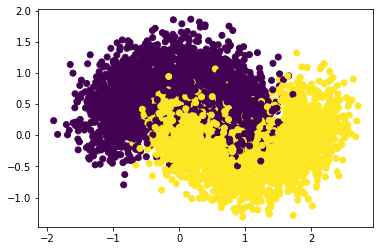

In [ ]:
plt.scatter(x=X[:,0], y=X[:,1], c=y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.3)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(3500, 2) (3500,)
(1500, 2) (1500,)


In [ ]:
print (sum(y_train==0))
print (sum(y_train==1))
print (sum(y_test==0))
print (sum(y_test==1))

1750
1750
750
750


In [ ]:
ada_model = AdaBoostClassifier(random_state=0, n_estimators=10, learning_rate=1.0)
ada_model.fit(X_train, y_train)
pred_train = ada_model.predict(X_train)
pred_test = ada_model.predict(X_test)
print("Precisión sobre los datos de entrenamiento: {:.2f}".format(100.0*ada_model.score(X_train, y_train)))
print("Precisión sobre los datos de test: {:.2f}".format(100.0*ada_model.score(X_test, y_test)))

Precisión sobre los datos de entrenamiento: 88.89
Precisión sobre los datos de test: 90.27


In [ ]:
pred_train

array([1, 1, 1, ..., 1, 0, 1])

**Grafo en Python**

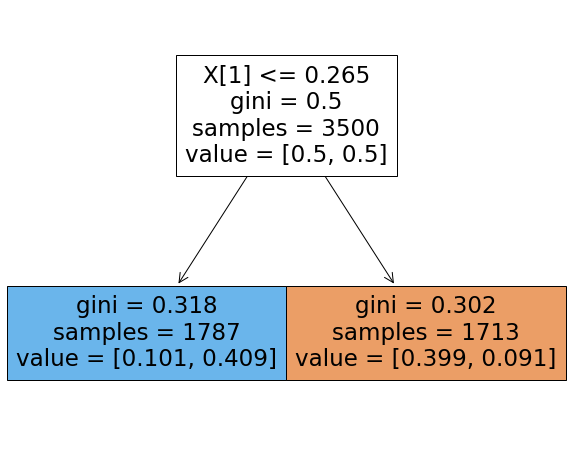

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,8))
plot_tree(ada_model.estimators_[0], filled=True, max_depth=2)
plt.show()

In [ ]:
## Los diferentes valores en "value" son porcentajes del total

value_total = 0.101+0.409+0.399+0.091
value_total

1.0

In [ ]:
def plot_boundaries_test(XX, YY, model, proba, XXtest, YYtest, title):

    plot_step = 0.1

    x_min, x_max = XX[:, 0].min() - 0.5, XX[:, 0].max() + 0.5
    y_min, y_max = XX[:, 1].min() - 0.5, XX[:, 1].max() + 0.5

    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                        np.arange(y_min, y_max, plot_step))
    ## https://interactivechaos.com/es/manual/tutorial-de-numpy/la-funcion-meshgrid
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    if proba:
      pred = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
    else:
      pred = model.predict(np.c_[xx.ravel(), yy.ravel()])
    pred = pred.reshape(xx.shape)
    cs = plt.contourf(xx, yy, pred, cmap=plt.cm.RdYlBu, alpha=0.5)

    plt.xlabel("X1")
    plt.ylabel("X2")

    scatter = plt.scatter(x=XXtest[:,0], y=XXtest[:,1], c=YYtest, 
                cmap=plt.cm.RdYlBu, edgecolor='black', alpha=0.5
                )

    plt.suptitle(title)
    # produce a legend with the unique colors from the scatter
    legend1 = plt.legend(*scatter.legend_elements(),
                        loc="lower left", title="Classes")
    plt.axis("tight")
    plt.show()

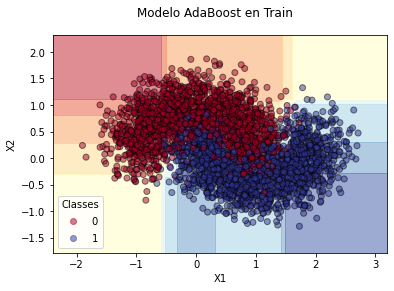

In [ ]:
plot_boundaries_test(X_train, y_train, ada_model, True, X_train, y_train, "Modelo AdaBoost en Train")

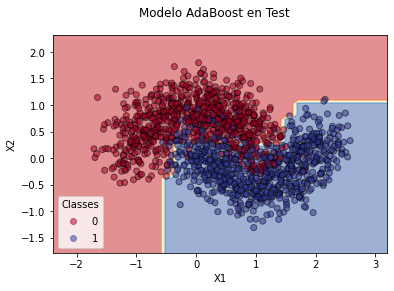

In [ ]:
plot_boundaries_test(X_train, y_train, ada_model, False, X_test, y_test,"Modelo AdaBoost en Test")

## **5. AdaBoost y Gradient Boosting**

**Diferencias**

* La forma en que se realiza la corrección errores.  
* Los AD de AdaBoost son más sencillos que los de Gradient Boosting (stumps).
* En GradientBoosting los AD son siempre de Regresión aunque el modelo final sea de Clasificación. En AdaBoost los AD son del mismo tipo que el modelo final.


**Parecidos**

* Los dos están basados en "boosting" o lanzamiento en serie de modelos.
* Los dos trabajan con AD más sencillos que en Random Forest.
* Ambos utilizan un parámetro de ratio de apredizaje (*learning_rate*) al basarse en la optimización del modelo siguiendo el sistema de Gradient Descent.


## **6. SAMME y SAMME.R**

La librería Scikit Learn puede usar dos modalidades de trabajo con modelos de Clasificación. El parámetro con el que nos da la posibilidad de elegir se llama *algorithm*:

* **SAMME**: (Stagewise Additive Modeling using a Multiclass Exponential Function). Se utiliza cuando los algoritmos predictores (que en este tema siempre han sido AD), no tienen la posibilidad de calcular la probabilidad de cada clase. Es decir, no tienen en método "predict_proba" en Scikit Learn.

* **SAMME.R**: (Stagewise Additive Modeling using a Multiclass Exponential Function Real). Se ajustan antes y con mejores resultados que el anterior. Sólo se pueden usar con algoritmos de los que se pueda obtener la probabilidad de las clases estimadas. En Scikit Learn es el valor que está por defecto porque, también por defecto, utiliza AD como predictores.


## **7. Parámetros más importantes**

Veamos cuales son:

1. **max_depth:** este parámetro no es propio del algoritmo de AdaBoost sino de los predictores AD que se lanzan. Lo normal es que se trate de "stumps", es decir, de AD con max_depth=1 pero puede haber casos en los que queramos aumentarlo. La recomendación es que no se superen los dos niveles de profundidad.

2. **algorithm:** la importancia de este parámetro aparece si queremos usar algoritmos diferentes a AD.

3. **n_estimators:** si se trata de un valor demasiado alto el modelo se hace más complejo y puede terminar sufriendo overfitting.

4. **learning_rate:** atendiendo a su valor, los pesos de las instancias correctas e incorrectas van a ser más o menos diferentes. Con valores altos, los datasets que se van generando tienen más instancias incorrectas repetidas y menos correctas. Esto hará que los stumps se ajusten más rápidamente a los errores. Esto puede llevar al modelo a no encontrar ese mínimo de la función de coste que va buscando.

![learning_rate](https://gblobscdn.gitbook.com/assets%2F-LvBP1svpACTB1R1x_U4%2F-Lw5TMq46bZGMFbfk1mp%2F-Lw6lH-WAYaxFcXq03Fq%2Fimage.png?alt=media&token=855de8fa-9c1b-473d-89c5-d9f2e2bc62d7)



Fuente de la imagen: https://gblobscdn.gitbook.com





## **8. Programación con Python**

En el siguiente ejemplo vamos a ver:

* Dataset sobre la estimación de precios de viviendas en Boston. Ver en:
https://scikit-learn.org/stable/datasets/toy_dataset.html#boston-dataset

* Cambio del max_depth a 2

* Análisis de resultados con MSE y R2 de los diferentes AD lanzados en serie.

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
## Carga de los datos
from sklearn.datasets import load_boston
data = load_boston()

In [ ]:
## Creación del dataframe
df_features = pd.DataFrame(data.data, columns=data.feature_names)
df_target = pd.DataFrame(data.target, columns=["median_price"])
df_all = pd.concat([df_features, df_target],axis=1)
## Split en Train/Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_features.values, df_target.values, 
                                                    random_state=42, test_size=0.3)
## Generación del modelo
ada_model = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=2), random_state=0, n_estimators=100, learning_rate=0.8)
ada_model.fit(X_train, y_train)
pred_train = ada_model.predict(X_train)
pred_test = ada_model.predict(X_test)
print("Precisión sobre los datos de entrenamiento: {:.2f}".format(100.0*ada_model.score(X_train, y_train)))
print("Precisión sobre los datos de test: {:.2f}".format(100.0*ada_model.score(X_test, y_test)))

Precisión sobre los datos de entrenamiento: 82.68
Precisión sobre los datos de test: 73.08


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


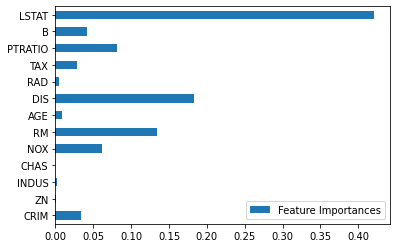

In [ ]:
df_imp = pd.DataFrame(ada_model.feature_importances_.reshape(1,-1), columns=df_features.columns, index=["Feature Importances"])
df_imp.T.plot.barh()
plt.legend()
plt.show();

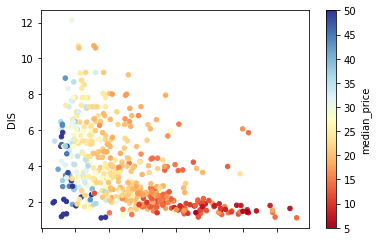

In [ ]:
df_all.plot.scatter(x="LSTAT", y="DIS", c="median_price", cmap=plt.cm.RdYlBu)

Ahora vamos a calcular el MSE de cada una de las predicciones de los AD

In [ ]:
errors_test = [mean_squared_error(y_test, y_pred) for y_pred in ada_model.staged_predict(X_test)]
errors_train = [mean_squared_error(y_train, y_pred) for y_pred in ada_model.staged_predict(X_train)]
errors_test[0:5]

[37.137913512648275,
 37.137913512648275,
 23.15600119263065,
 23.15600119263065,
 30.139556184880874]

In [ ]:
## el mejor número de AD nos lo da el índice donde MSE es menor
best_n_AD = np.argmin(errors_test)
best_n_AD

65

In [ ]:
best_model = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=2), random_state=0, n_estimators=best_n_AD, learning_rate=0.8)
best_model.fit(X_train, y_train)
pred_train = best_model.predict(X_train)
pred_test = best_model.predict(X_test)
print("Precisión sobre los datos de entrenamiento: {:.2f}".format(100.0*best_model.score(X_train, y_train)))
print("Precisión sobre los datos de test: {:.2f}".format(100.0*best_model.score(X_test, y_test)))

Precisión sobre los datos de entrenamiento: 82.67
Precisión sobre los datos de test: 73.90


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


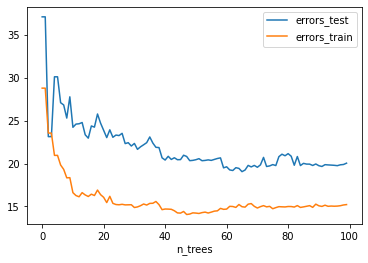

In [ ]:
d = pd.DataFrame({"n_trees":list(range(100)), "errors_test":errors_test, "errors_train":errors_train})
d.set_index("n_trees").plot()

In [ ]:
from sklearn.metrics import r2_score
r2_test = [r2_score(y_test, y_pred) for y_pred in ada_model.staged_predict(X_test)]
r2_train = [r2_score(y_train, y_pred) for y_pred in ada_model.staged_predict(X_train)]
r2_test[0:5]

[0.5015921264628871,
 0.5015921264628871,
 0.6892358179973881,
 0.6892358179973881,
 0.595513299304153]

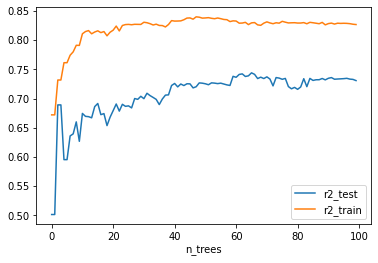

In [ ]:
d = pd.DataFrame({"n_trees":list(range(100)), "r2_test":r2_test, "r2_train":r2_train})
d.set_index("n_trees").plot()

Viendo las curvas de MSE y R2 podemos llegar a la conclusión de que (para los parámetros utilizados) nos encontramos con la mejor solución ya que minimiza los errores y no sufre overfitting.